In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

# 多变量梯度下降
原理和单变量梯度下降一样，不做解释

C:\Users\23155\AppData\Local\Temp\ipykernel_14368\1415182943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,0]=x.iloc[:,0]/5000
C:\Users\23155\AppData\Local\Temp\ipykernel_14368\1415182943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,1]=x.iloc[:,1]/5
C:\Users\23155\AppData\Local\Temp\ipykernel_14368\1415182943.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before

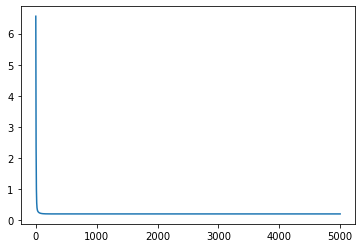

In [114]:
def getData():
    data=pd.read_csv("ex1data2.txt",header=None)
    x=data.iloc[:,0:-1]
    y=data.iloc[:,-1]
    #归一化
    x.iloc[:,0]=x.iloc[:,0]/5000
    x.iloc[:,1]=x.iloc[:,1]/5
    x=np.insert(np.array(x),0,np.ones(x.shape[0]),axis=1)
    y=y/100000
    
    theta=np.zeros((1,3))
    return x,y,theta
    
def compute(x,theta):
    return x@theta.T

def cost(hx,y,theta,l):
    errorValue=hx-y[:,np.newaxis]
    return (np.power(errorValue,2).sum()+theta@theta.T*l)/(2*hx.shape[0]),errorValue

def gradient_descent(x,errorValue,theta,l):
    return (np.sum(errorValue*x,axis=0)+l*theta)/x.shape[0]

def main(nums,speed,l):
    x,y,theta=getData()
    costs=[]
    for i in range(nums):    
        hx=compute(x,theta)
        j,errorValue=cost(hx,y,theta,l)
        costs.append(j[0][0])
        decline=gradient_descent(x,errorValue,theta,l)
        theta=theta-speed*decline
    pl.plot(costs)
    return x,y,theta
x1,y1,theta1=main(5000,1.2,0)

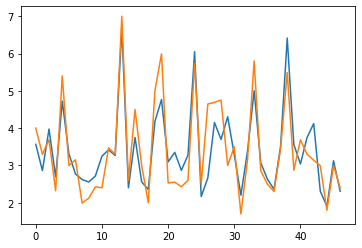

In [115]:
def test(x1,y1,theta1):
    hx1=x1@theta1.T
    pl.plot(hx1)
    pl.plot(y1)
test(x1,y1,theta1)

# 多变量正规方程
公式如下
$$\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$$

In [104]:
def normal_equations(x,y):
    theta=np.linalg.inv(x.T@x)@x.T@y
    return theta
def main_1():
    x,y,theta=getData()
    theta=normal_equations(x,y)
    return theta
theta2=main_1()

C:\Users\23155\AppData\Local\Temp\ipykernel_14368\1415182943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,0]=x.iloc[:,0]/5000
C:\Users\23155\AppData\Local\Temp\ipykernel_14368\1415182943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,1]=x.iloc[:,1]/5


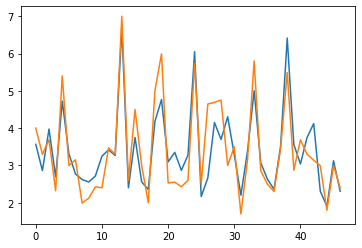

In [105]:
test(x1,y1,theta2)